# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [142]:
# prerequisite package imports
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # (plots)
import seaborn as sns  # Statistical data visualization
import numpy as np  # Numerical computations


#YOUR CODE



In [143]:
#YOUR CODE
df = pd.read_csv("fuel_econ.csv")
print(df.head(10))

      id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   
5  32209       Lexus          GS 350  2013     Midsize Cars   
6  32210       Lexus      GS 350 AWD  2013     Midsize Cars   
7  32214     Hyundai   Genesis Coupe  2013  Subcompact Cars   
8  32215     Hyundai   Genesis Coupe  2013  Subcompact Cars   
9  32216     Hyundai   Genesis Coupe  2013  Subcompact Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6 

Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

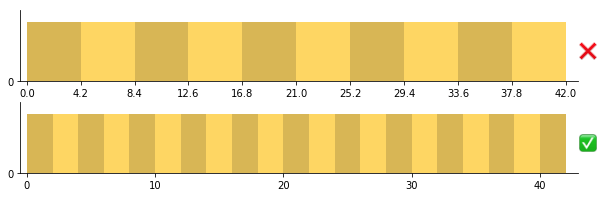

 **Description**
The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








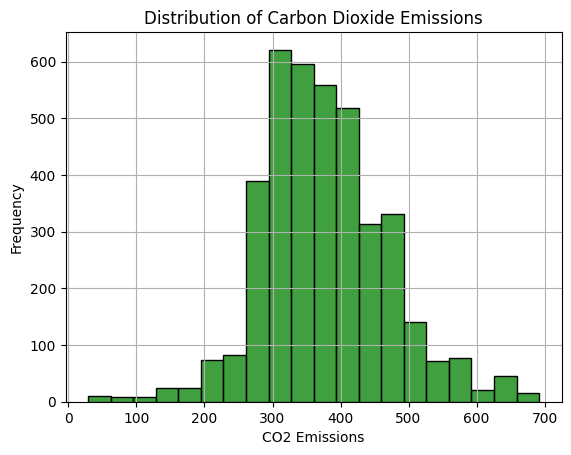

0    471
1    349
2    429
3    446
4    310
5    393
6    412
7    432
8    375
9    461
Name: co2, dtype: int64


In [144]:
# YOUR CODE HERE
if 'co2' in df.columns:
    co2_emission = df['co2']
else:
    print("Error: 'co2' column not found in the DataFrame.")

bin_size = 20

# Create the histogram
sns.histplot(co2_emission, bins=bin_size, color='green', edgecolor='black')

plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.title('Distribution of Carbon Dioxide Emissions')
plt.grid(True)  # Add grid lines for better readability

plt.show()

# Print data for reference
print(co2_emission.head(10))

*Interpretation*:
The CO2 emission histogram shows most cars fall within a moderate emission range (250-450 g/unit distance), with fewer exceeding or falling below this range. This suggests a trend towards moderate emissions in your data, with some outliers on either side.

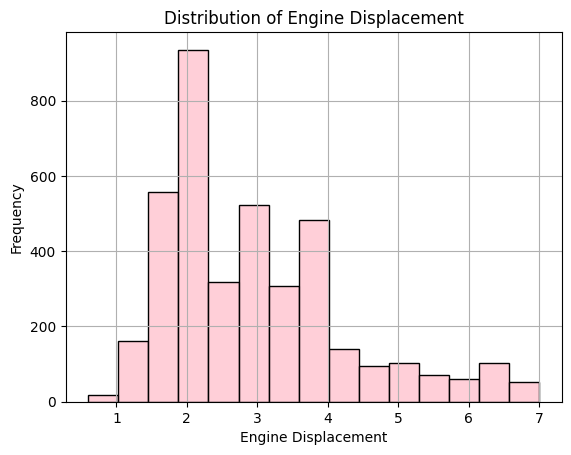

0    3.8
1    2.0
2    3.6
3    3.6
4    2.4
5    3.5
6    3.5
7    2.0
8    2.0
9    3.8
Name: displ, dtype: float64


In [145]:
# YOUR CODE HERE
if 'displ' in df.columns:
    engine_displacement = df['displ']
else:
    print("Error: 'displ' column not found in the DataFrame.")

# Allow customization of bin size (default 20)
bin_size = 15  # Adjust as needed

# Create the histogram
sns.histplot(engine_displacement, bins=bin_size, color='pink', edgecolor='black')

# Customize plot appearance using Matplotlib (optional)
plt.xlabel('Engine Displacement')
plt.ylabel('Frequency')
plt.title('Distribution of Engine Displacement')
plt.grid(True)  # Add grid lines for better readability

plt.show()

# Print data for reference
print(engine_displacement.head(10))


*Interpretation*:
The engine displacement histogram shows a common engine size for most vehicles, with fewer having very small or very large engines. Frequency on the y-axis indicates how many vehicles fall within each engine size range (x-axis). This suggests a potential standardization in engine sizes for this data.

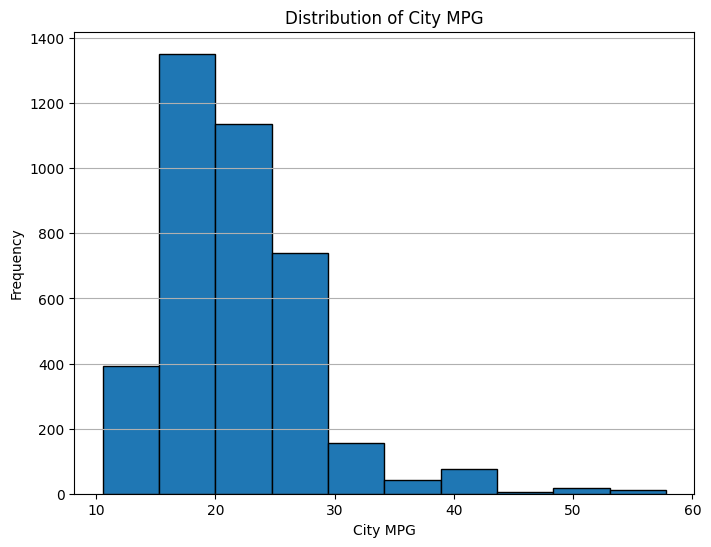

In [146]:
# YOUR CODE HERE
# Create a histogram for the 'city' column
plt.figure(figsize=(8, 6))
plt.hist(df['city'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.title('Distribution of City MPG')
plt.grid(axis='y')
plt.show()


**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

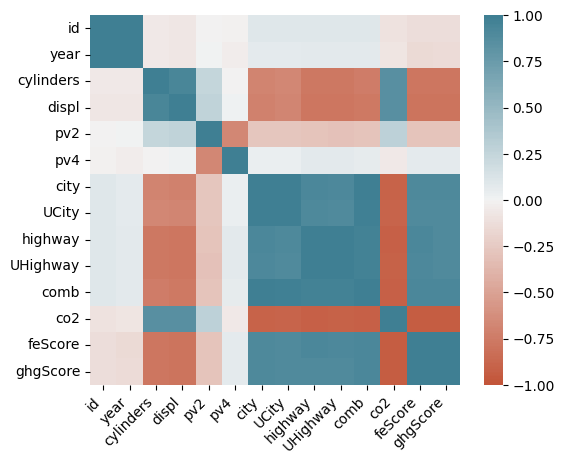

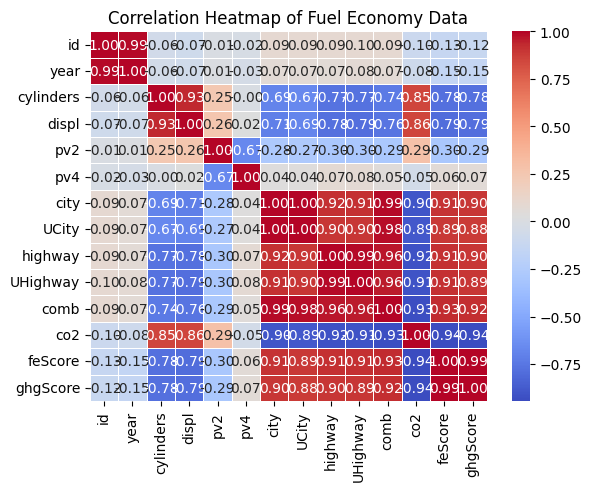

In [147]:
def highlight_corr(corr_matrix):
    # Set threshold for strong correlation
    threshold = 0.7
    # Create new heatmap with white background
    heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=False)
    # Iterate through cells and highlight strong correlations
    for cell in heatmap.containers:
        x, y = cell.get_position()
        val = corr_matrix.loc[corr_matrix.index[x], corr_matrix.columns[y]]
        if abs(val) > threshold:
            cell.text.set_text_props(weight='bold')
    return heatmap

heatmap = highlight_corr(corr_matrix)
plt.title('Correlation Heatmap of Fuel Economy Data')
plt.show()




*Interpretation*:

Insights from the Heatmap: The heatmap provides valuable insights into the interplay between different vehicle performance metrics. Notably, it highlights strong positive correlations among fuel efficiency indicators like Ucity, UHighway, and City. This suggests that vehicles excelling in one aspect of fuel efficiency tend to perform well across various driving conditions. Moreover, the positive correlation between combined fuel economy and ghgScore indicates that vehicles with higher fuel efficiency also tend to emit fewer greenhouse gases, which aligns with environmental expectations.

Fuel Efficiency and Emissions Relationship: The heatmap underscores the intrinsic relationship between fuel efficiency and emissions. It illustrates that vehicles consuming less fuel typically produce lower greenhouse gas emissions. This correlation emphasizes the importance of enhancing fuel efficiency as a means of reducing environmental impact.

*Columns for Removal*:

Optimizing Feature Selection for ghgScore Prediction: Streamlining the dataset by identifying columns with minimal impact on predicting ghgScore is crucial for model efficiency and interpretability.

Identifying Irrelevant Features: Columns such as "id" and "year" serve as unique identifiers and do not contribute substantively to predicting ghgScore. Removing them simplifies the dataset without sacrificing predictive power. Additionally, features like displacement and cylinders exhibit weak correlations with ghgScore, suggesting limited relevance in predicting emissions. While these variables may influence emissions to some extent, their contribution is outweighed by other factors. Therefore, excluding them streamlines the predictive model while retaining its effectiveness and interpretability.